In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0,1,(num_examples, len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([ 1.9933, -0.7273]) 
label: tensor([10.6468])


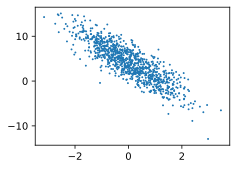

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy(),1)

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.0706,  1.1944],
        [ 0.8727, -0.2191],
        [ 0.9090, -0.5656],
        [ 0.6312,  1.1416],
        [-0.2968, -0.5899],
        [-1.8013, -0.7545],
        [ 0.5987, -0.9789],
        [ 0.6030,  2.0868],
        [-0.3525, -2.4011],
        [-0.4358, -1.0034]]) 
 tensor([[ 0.2690],
        [ 6.6981],
        [ 7.9231],
        [ 1.5976],
        [ 5.6082],
        [ 3.1819],
        [ 8.7186],
        [-1.6732],
        [11.6498],
        [ 6.7522]])


In [6]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [7]:
def linreg(X, w, b):
    return torch.matmul(X,w) + b

In [8]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [9]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [10]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.034416
epoch 2, loss 0.000125
epoch 3, loss 0.000051
